<a href="https://colab.research.google.com/github/Youel-jpg/ML-flowers/blob/main/At.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачи

***Цель:*** Разработка и тестирование приложения, основанного на машинном обучении.

###**Задачи**:

*   Запуск базовых моделей
*   Оценка качества результата по релевантным для задачи метрикам  
*   Получение отчетов по результатам

**Форма работы:** индивидуальная / групповая (2-3 человека в группе)

*Набор технологий:*

*   Python, Pandas, Numpy
*   Pytorch / Tensorflow / Keras


*   Google Colaboratory
*   Другие подходящие для задачи библиотеки


###**Требования к результатам:**

Код должен быть выложен на github / Google Colaboratory и удовлетворять следующим критериям:

● Оценка за код задания будет распределена между следующими аспектами:

>○ функциональность,

>○ структура и организация кода,

>○ инструкция для запуска моделей.

###Оценка отчета и презентации состоит из следующих компонент:

● качество отчета,

● качество документации по наборам данных,

● качество слайдов с постановкой задачи, выбранным подходом и результатами

## План работы



● Необходимо разработать базовую программную реализацию модели (допускается использование существующей реализации)

● Необходимо провести эксперименты с одним или более наборами данных и представить результаты в виде отчета в формате PDF

Проекты на выбор:


Проект 5. Поиск похожих картинок (цветов) Необходимо: обучить и протестировать модель для поиска похожих картинок. Коллекции для поиска и обучения нужно собрать из предложенных ниже наборов данных.

**Датасеты: **

https://www.kaggle.com/alxmamaev/flowers-recognition

https://www.kaggle.com/c/tpu-getting-started/data



## Подключение библиотек

In [ ]:
# Подключаем TensorFlow и tf.keras
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Подключаем вспомогательные библиотеки numpy и matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.8.2


## Подготовка данных

### Подключение к диску

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# !unzip /content/drive/MyDrive/flowers_train_model.zip

Mounted at /content/drive


### Создание директорий для тестирования, обучения и проверки на самом диске

* train (данные для обучения)
* val (данные для проверки)
* test (данные для тестирования)
В каждом каталоге создаются подкаталоги, в соответсвии с названиями классов.

Изображения переписваются из исходного каталога в новую структуру. По-умолчанию для обучения используется 70% изображений, для проверки - 15%, для тестрования также 15%.

In [ ]:
# Каталог с набором данных
data_dir = '/content/drive/MyDrive/flowers_machine_learning/flowers'
# Каталог с данными для обучения
train_dir = '/content/drive/MyDrive/flowers_machine_learning/train'
# Каталог с данными для проверки
val_dir = '/content/drive/MyDrive/flowers_machine_learning/val'
# Каталог с данными для тестирования
test_dir = '/content/drive/MyDrive/flowers_machine_learning/test'
# Часть набора данных для тестирования
test_data_portion = 0.15
# Часть набора данных для проверки
val_data_portion = 0.15
# Количество элементов данных в одном классе
nb_images = 700

Создание поддиректорий в каждой папке

In [ ]:
import shutil
import os

def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name, "daisy"))
    os.makedirs(os.path.join(dir_name, "dandelion"))
    os.makedirs(os.path.join(dir_name, "rose"))
    os.makedirs(os.path.join(dir_name, "sunflower"))
    os.makedirs(os.path.join(dir_name, "tulip"))

In [ ]:
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

### Копирование каждого вида цветов

In [ ]:
def copy_images(start_index, end_index, source_dir, dest_dir):

        for i in range(start_index, end_index):
          filename = os.listdir(source_dir+"/daisy")[i]
          shutil.copy2(os.path.join(source_dir, "daisy", filename),
                      os.path.join(dest_dir, "daisy"))

          filename = os.listdir(source_dir+"/dandelion")[i]
          shutil.copy2(os.path.join(source_dir, "dandelion", filename),
                        os.path.join(dest_dir, "dandelion"))

          filename = os.listdir(source_dir+"/rose")[i]
          shutil.copy2(os.path.join(source_dir, "rose", filename),
                        os.path.join(dest_dir, "rose"))

          filename = os.listdir(source_dir+"/sunflower")[i]
          shutil.copy2(os.path.join(source_dir, "sunflower", filename),
                        os.path.join(dest_dir, "sunflower"))

          filename = os.listdir(source_dir+"/tulip")[i]
          shutil.copy2(os.path.join(source_dir, "tulip", filename),
                        os.path.join(dest_dir, "tulip"))

Рассчет индексов

In [ ]:
start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
start_test_data_idx = int(nb_images * (1 - test_data_portion))
print("start val (index): ",start_val_data_idx)
print("start test (index): ",start_test_data_idx)

start val (index):  489
start test (index):  595


Копирование изображений

In [ ]:
copy_images(0, start_val_data_idx, data_dir, train_dir)
copy_images(start_val_data_idx, start_test_data_idx, data_dir, val_dir)
copy_images(start_test_data_idx, nb_images, data_dir, test_dir)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Создание модели машинного обучения

In [ ]:

# Каталог с данными для обучения
train_dir = '/content/drive/MyDrive/flowers_machine_learning/train'
# Каталог с данными для проверки
val_dir = '/content/drive/MyDrive/flowers_machine_learning/val'
# Каталог с данными для тестирования
test_dir = '/content/drive/MyDrive/flowers_machine_learning/test'
# Размеры изображения
img_width, img_height = 250, 250
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 7
# Размер мини-выборки
batch_size = 16
# Количество изображений для обучения
nb_train_samples = 2445
# Количество изображений для проверки
nb_validation_samples = 530
# Количество изображений для тестирования
nb_test_samples = 525


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), input_shape=input_shape))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(5))
model.add(keras.layers.Activation('softmax'))

optimizer = "adam"
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, metrics=["accuracy"], loss=loss)

## Создание генератора изображений и обучение модели

In [ ]:
#приведение всех изображений к одному виду
df = keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255)

In [ ]:
train_generator = df.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical")

Found 2445 images belonging to 5 classes.


In [ ]:
test_generator = df.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical")

Found 525 images belonging to 5 classes.


In [ ]:
val_generator = df.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical")

Found 530 images belonging to 5 classes.


Обучение модели с помощью генераторов

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/7


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


152/152 [==============================] - 572s 4s/step - loss: 1.4088 - accuracy: 0.3569 - val_loss: 1.1862 - val_accuracy: 0.4678
Epoch 2/7
152/152 [==============================] - 15s 96ms/step - loss: 1.1858 - accuracy: 0.4846 - val_loss: 1.1190 - val_accuracy: 0.5682
Epoch 3/7
152/152 [==============================] - 15s 96ms/step - loss: 1.0938 - accuracy: 0.5471 - val_loss: 1.0461 - val_accuracy: 0.6061
Epoch 4/7
152/152 [==============================] - 15s 96ms/step - loss: 0.9816 - accuracy: 0.6101 - val_loss: 0.9539 - val_accuracy: 0.6269
Epoch 5/7
152/152 [==============================] - 15s 97ms/step - loss: 0.8988 - accuracy: 0.6505 - val_loss: 0.9960 - val_accuracy: 0.6193
Epoch 6/7
152/152 [==============================] - 15s 96ms/step - loss: 0.8209 - accuracy: 0.6908 - val_loss: 0.9044 - val_accuracy: 0.6610
Epoch 7/7
152/152 [==============================] - 15s 96ms/step - loss: 0.7040 - accuracy: 0.7423 - val_loss: 0.9208 - val_accuracy: 0.6686
dict_keys(

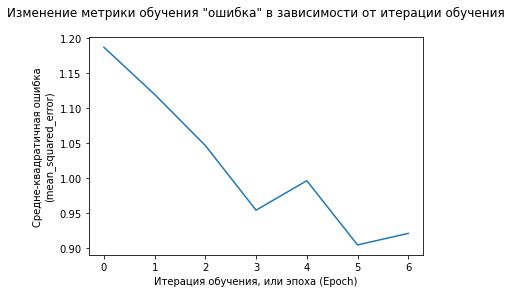

In [ ]:
history = model.fit_generator(
   train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = val_generator,
    validation_steps = nb_validation_samples // batch_size)

print(history.history.keys())
plt.title('Изменение метрики обучения "ошибка" в зависимости от итерации обучения\n')
plt.xlabel("Итерация обучения, или эпоха (Epoch)")
plt.ylabel("Средне-квадратичная ошибка\n(mean_squared_error)")
plt.plot(history.history["val_loss"])

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Аккуратность на тестовых данных: 67.97%


## Проверка с помощью графиков

In [ ]:
class_names = ["daisy", "dandelion", "rose","sunflower","tulip"]

def plot_image(i, predictions_array, true_label, img):
    """Эта функция строит и выводит картинку, хранящуюся как список пикселей

    :param i: какое предсказание вывести (индекс)
    :param predictions_array: набор всех предсказаний
    :param true_label: имена классов,
    :param img: "картинки" в виде массива пикселей
    """
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true = np.argmax(true_label)
    if predicted_label == true:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true],
        ),
        color=color,
    )
    print(predictions_array)


def plot_value_array(i, predictions_array, true_label):
    """Эта функция строит и выводит столбиковую диаграмму для предсказания

    :param i: какое предсказание вывести (индекс)
    :param predictions_array: набор всех предсказаний
    :param true_label: имена классов
    """
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([0, 1, 2, 3, 4])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.xlim([0, 4])
    predicted_label = np.argmax(predictions_array)
    true =  np.argmax(true_label)

    thisplot[predicted_label].set_color("red")
    thisplot[true].set_color("blue")

In [ ]:
img, labels=test_generator.next()

[9.9910599e-01 2.2694156e-05 8.5285056e-04 2.4420981e-06 1.5952632e-05]

Предсказание для test_images[1]



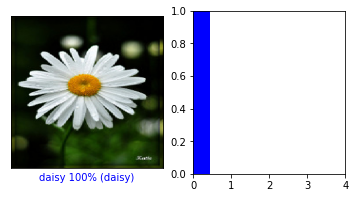

In [ ]:
predictions = model.predict(img)

i = 10
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, labels, img)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, labels)
print("\nПредсказание для test_images[1]\n")
plt.show()

[0.09973776 0.40867597 0.00768174 0.46918273 0.01472192]
[0.01372008 0.07240693 0.056122   0.6437407  0.21401027]
[0.48948082 0.2102271  0.02220966 0.24111511 0.0369672 ]
[5.6849071e-06 3.1255752e-07 3.5840335e-01 5.6833273e-05 6.4153385e-01]
[0.10602064 0.02022555 0.33542478 0.06447115 0.47385785]
[0.11338211 0.0655739  0.00329366 0.76838434 0.04936593]
[0.39114588 0.42648983 0.0166418  0.1229061  0.04281627]
[0.03312097 0.00595745 0.36031482 0.02610011 0.57450664]
[0.02164123 0.01161081 0.7191503  0.01523331 0.23236433]
Предсказание для test_images[0] – test_images[8]


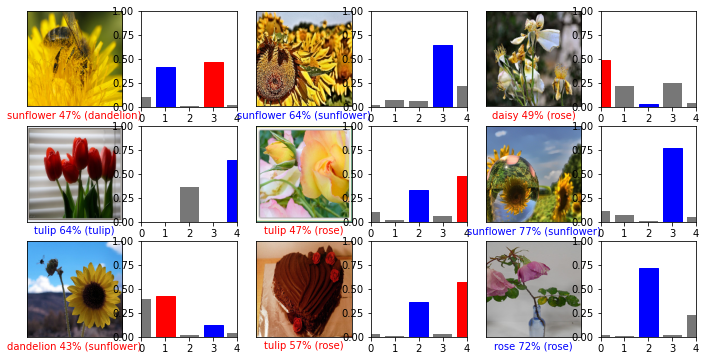

In [ ]:
# Отображаем первые X тестовых изображений одного из наборов генератора, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions,  labels, img)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, labels)
print("Предсказание для test_images[0] – test_images[8]")
plt.show()

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('/content/drive/MyDrive/flowers_machine_learning/img.png')
resized_image = img.resize((250, 250))
resized_image.save('/content/drive/MyDrive/flowers_machine_learning/resized.png')

In [ ]:
img = Image.open('/content/drive/MyDrive/flowers_machine_learning/resized.png')
img = np.expand_dims(img, 0)

In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

[[0. 0. 0. 0. 1.]]


In [ ]:
print(np.argmax(predictions_single[0]))

4


[0. 0. 0. 0. 1.]
Предсказание для картинки resized.png


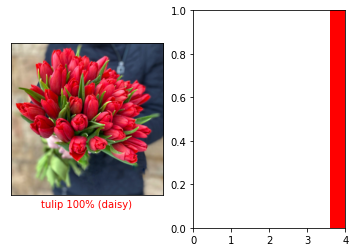

In [ ]:
class_names = ["daisy", "dandelion", "rose", "sunflower","tulip"]
plt.subplot(1, 2, 1)
plot_image(0, predictions_single, class_names, img)
plt.subplot(1, 2, 2)
plot_value_array(0, predictions_single, class_names)
print("Предсказание для картинки resized.png")
plt.show()